Vietnamese healthcare expenditures prediction based on the number of people in the household,sex,age,, years of education and expenditures on food

In [123]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#
from sklearn import metrics
from sklearn.metrics import r2_score
#
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


### Data Collect and Analysis

In [124]:
df = pd.read_csv(r"C:\Users\ACER\repos\week4\dataset\VietNamH.csv")

In [125]:
df.head()

,Unnamed: 0,sex,age,educyr,farm,urban,hhsize,lntotal,lnmed,lnrlfood,lnexp12m,commune
0,1,female,68,4.0,no,yes,6,10.13649,11.233210,8.639339,11.233210,1
1,2,female,57,8.0,no,yes,6,10.25206,8.505120,9.345752,8.505120,1
2,3,male,42,14.0,no,yes,6,10.93231,8.713418,10.226330,8.713418,1
3,4,female,72,9.0,no,yes,6,10.26749,9.291736,9.263722,9.291736,1
4,5,female,73,1.0,no,yes,8,10.48811,7.555382,9.592890,7.555382,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5999 non-null   int64  
 1   sex         5999 non-null   object 
 2   age         5999 non-null   int64  
 3   educyr      5999 non-null   float64
 4   farm        5999 non-null   object 
 5   urban       5999 non-null   object 
 6   hhsize      5999 non-null   int64  
 7   lntotal     5999 non-null   float64
 8   lnmed       5999 non-null   float64
 9   lnrlfood    5999 non-null   float64
 10  lnexp12m    5006 non-null   float64
 11  commune     5999 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 562.5+ KB


In [127]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [128]:
df.head()

,sex,age,educyr,farm,urban,hhsize,lntotal,lnmed,lnrlfood,lnexp12m,commune
0,female,68,4.0,no,yes,6,10.13649,11.233210,8.639339,11.233210,1
1,female,57,8.0,no,yes,6,10.25206,8.505120,9.345752,8.505120,1
2,male,42,14.0,no,yes,6,10.93231,8.713418,10.226330,8.713418,1
3,female,72,9.0,no,yes,6,10.26749,9.291736,9.263722,9.291736,1
4,female,73,1.0,no,yes,8,10.48811,7.555382,9.592890,7.555382,1


### Correlation test 

In [129]:
# Overall, as kendall correlation, the variable have a weak to moderate correlation with each other
# Some have little affection to other variable only
df.corr(method='kendall')

,age,educyr,hhsize,lntotal,lnmed,lnrlfood,lnexp12m,commune
age,1.000000,-0.249509,-0.070427,0.019603,0.053089,-0.007454,0.073460,-0.025023
educyr,-0.249509,1.000000,-0.006385,0.200411,-0.027569,0.166824,-0.060068,-0.227745
hhsize,-0.070427,-0.006385,1.000000,0.285064,0.112361,0.361310,0.101208,0.107509
lntotal,0.019603,0.200411,0.285064,1.000000,0.158454,0.715657,0.165330,-0.159495
lnmed,0.053089,-0.027569,0.112361,0.158454,1.000000,0.103282,1.000000,0.041012
lnrlfood,-0.007454,0.166824,0.361310,0.715657,0.103282,1.000000,0.097594,-0.117016
lnexp12m,0.073460,-0.060068,0.101208,0.165330,1.000000,0.097594,1.000000,0.055711
commune,-0.025023,-0.227745,0.107509,-0.159495,0.041012,-0.117016,0.055711,1.000000


In [130]:
# Drop lnmed since lnexp12m is the same as lnmed
df.drop("lnmed", axis=1, inplace=True)
df.drop("lntotal", axis=1, inplace=True)

In [131]:
df.head()

,sex,age,educyr,farm,urban,hhsize,lnrlfood,lnexp12m,commune
0,female,68,4.0,no,yes,6,8.639339,11.233210,1
1,female,57,8.0,no,yes,6,9.345752,8.505120,1
2,male,42,14.0,no,yes,6,10.226330,8.713418,1
3,female,72,9.0,no,yes,6,9.263722,9.291736,1
4,female,73,1.0,no,yes,8,9.592890,7.555382,1


Transfer from natural log into normal numbers

In [132]:
#df['lntotal'] = np.exp(df['lntotal'])
df['lnrlfood'] = np.exp(df['lnrlfood'])
df['lnexp12m'] = np.exp(df['lnexp12m'])

In [133]:
df.head()

,sex,age,educyr,farm,urban,hhsize,lnrlfood,lnexp12m,commune
0,female,68,4.0,no,yes,6,5649.594208,75599.881900,1
1,female,57,8.0,no,yes,6,11450.080047,4939.996986,1
2,male,42,14.0,no,yes,6,27620.954924,6084.002109,1
3,female,72,9.0,no,yes,6,10548.321218,10847.999890,1
4,female,73,1.0,no,yes,8,14660.176281,1911.000107,1


In [134]:
# Checking for missing values 
df.isna().sum()

sex           0
age           0
educyr        0
farm          0
urban         0
hhsize        0
lnrlfood      0
lnexp12m    993
commune       0
dtype: int64

In [135]:
# remove rows that contain missing value
df.dropna(inplace=True)

In [136]:
# Recount it
df.isna().sum()

sex         0
age         0
educyr      0
farm        0
urban       0
hhsize      0
lnrlfood    0
lnexp12m    0
commune     0
dtype: int64

# categorical feature
- sex 
- urban
- farm
# numerical feature
- age
- edcational level
- households size
- commune
- total healthcare expenditure (within 12 months)



In [137]:
df.describe()

,age,educyr,hhsize,lnrlfood,lnexp12m,commune
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000
mean,48.061326,7.147956,4.832601,6893.455164,1821.662731,98.354375
std,13.799739,4.333304,1.952570,4192.871227,5577.654948,56.054233
min,18.000000,0.000000,1.000000,576.147670,1.000000,1.000000
25%,37.000000,4.000000,4.000000,4430.302976,195.000086,50.000000
50%,45.000000,7.000000,5.000000,6071.169451,585.000089,99.000000
75%,58.750000,10.000000,6.000000,8247.414479,1623.000815,147.000000
max,95.000000,21.000000,19.000000,87890.763630,234040.627251,194.000000


In [138]:
# Rename column (change from natural log data to natural data)
df.rename(columns = {'lnrlfood':'rlfood', 'lnexp12m':'exp12m', 'lntotal':'total','lnmed':'med'}, inplace = True)


In [139]:
df.head()

,sex,age,educyr,farm,urban,hhsize,rlfood,exp12m,commune
0,female,68,4.0,no,yes,6,5649.594208,75599.881900,1
1,female,57,8.0,no,yes,6,11450.080047,4939.996986,1
2,male,42,14.0,no,yes,6,27620.954924,6084.002109,1
3,female,72,9.0,no,yes,6,10548.321218,10847.999890,1
4,female,73,1.0,no,yes,8,14660.176281,1911.000107,1


<Figure size 432x432 with 0 Axes>

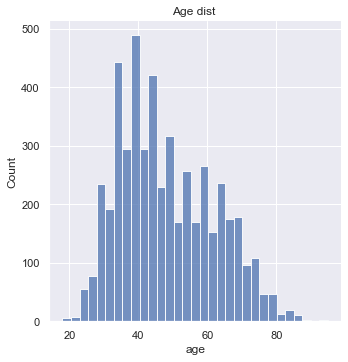

In [140]:
# distribution of age avlue
sns.set()
plt.figure(figsize =(6,6))
sns.displot(df['age'])
plt.title('Age dist ')
plt.show()

approximate age is 40 

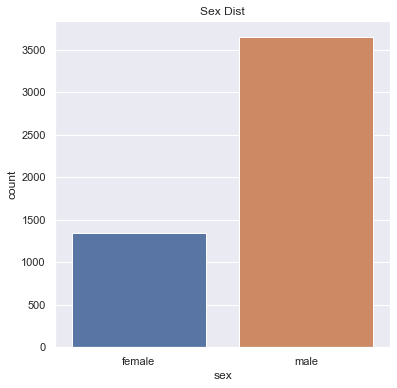

In [141]:
# Gender columns
plt.figure(figsize =(6,6))
sns.countplot(x='sex', data = df)
plt.title('Sex Dist')
plt.show()

In [142]:
df['sex'].value_counts()


male      3656
female    1350
Name: sex, dtype: int64

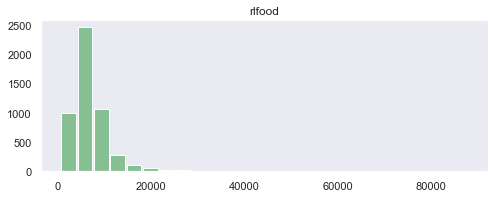

In [143]:
ax = df.hist(column='rlfood', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)


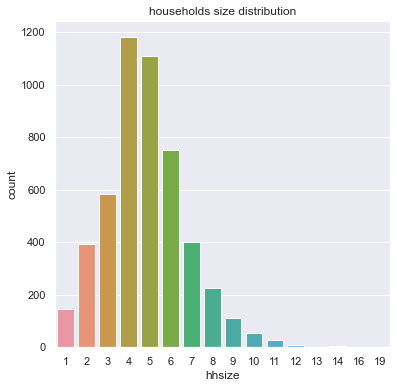

In [144]:
# households size column
plt.figure(figsize=(6,6))
sns.countplot(x='hhsize', data = df)
plt.title('households size distribution')
plt.show()

In [145]:
df['hhsize'].value_counts()

4     1183
5     1109
6      750
3      584
7      402
2      392
8      227
1      146
9      112
10      56
11      27
12       9
14       4
13       3
19       1
16       1
Name: hhsize, dtype: int64

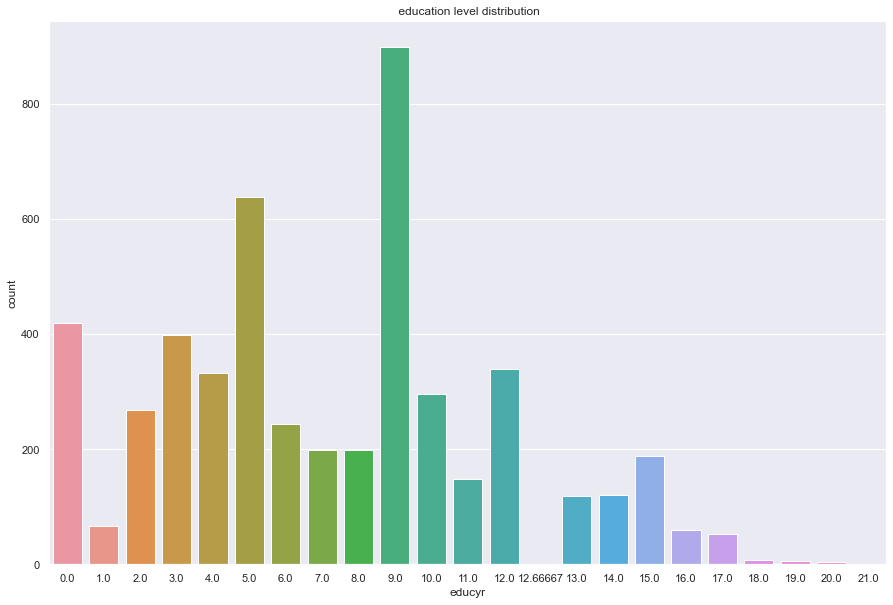

In [146]:
# Education level distribution
plt.figure(figsize=(15,10))
sns.countplot(x='educyr', data = df)
plt.title(' education level distribution')
plt.show()


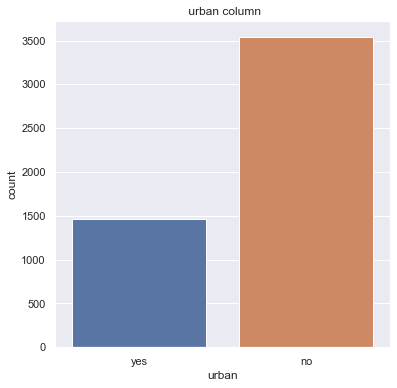

In [147]:
# Urban checker column 
# Assume non-urban citizen as countryside citizen 
plt.figure(figsize=(6,6))
sns.countplot(x='urban', data = df)
plt.title(' urban column')
plt.show()




In [148]:
df['urban'].value_counts()

no     3544
yes    1462
Name: urban, dtype: int64

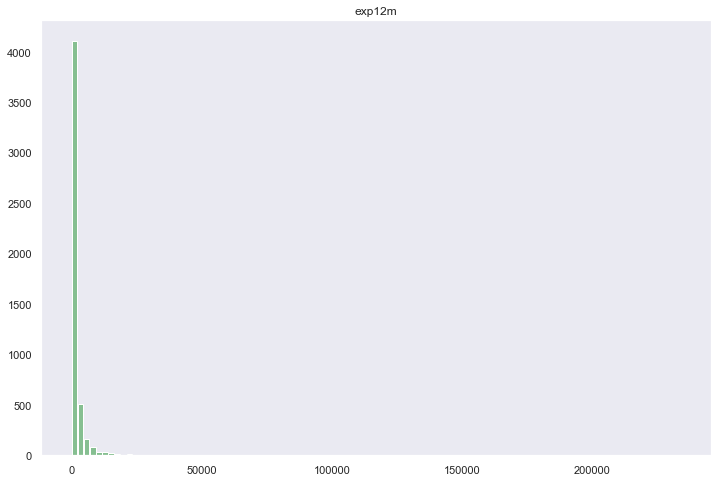

In [149]:

ax = df.hist(column='exp12m', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


Data Pre-Processing


In [150]:
df.to_csv("clean_model.csv")

In [151]:
# convert categorical value into 0, 1 or 2
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace = True)
# encoding urban column
df.replace({'urban':{'yes':0,'no':1}}, inplace = True)
# encoding farm column
df.replace({'farm':{'yes':0,'no':1}}, inplace = True)


In [152]:
df.head()

,sex,age,educyr,farm,urban,hhsize,rlfood,exp12m,commune
0,1,68,4.0,1,0,6,5649.594208,75599.881900,1
1,1,57,8.0,1,0,6,11450.080047,4939.996986,1
2,0,42,14.0,1,0,6,27620.954924,6084.002109,1
3,1,72,9.0,1,0,6,10548.321218,10847.999890,1
4,1,73,1.0,1,0,8,14660.176281,1911.000107,1


In [153]:
y = df['exp12m']
x = df.drop(columns ='exp12m', axis = 1)


### Splitting data into Training data & Testing data

In [154]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [155]:
print(x.shape,x_train.shape,x_test.shape)

(5006, 8) (4004, 8) (1002, 8)


### Model Training
#### Using linear REgression


In [156]:
# Loading regressing model
regressor = LinearRegression()

In [157]:
regressor.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [158]:
# Predictiong on training data
training_data_prediction = regressor.predict(x_train)

In [159]:
# R squared value 
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R2 value: ', r2_train)

R2 value:  0.018259106854840446


In [160]:
# Prediction test data
test_data_prediction = regressor.predict(x_test)

In [161]:
# r2 value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R2 val:', r2_test)


R2 val: 0.030260356380884756


### Test Predicting

In [162]:
'''
# Test 1 
# near (200 value difference)
input_data = ("0",66,2,"0","0",6,7.707512)
array_input = np.asarray(input_data)

# Reshape the array 

reshaped_array_input = array_input.reshape(1,-1)

prediction = regressor.predict(reshaped_array_input)
print(prediction)
'''

'\n# Test 1 \n# near (200 value difference)\ninput_data = ("0",66,2,"0","0",6,7.707512)\narray_input = np.asarray(input_data)\n\n# Reshape the array \n\nreshaped_array_input = array_input.reshape(1,-1)\n\nprediction = regressor.predict(reshaped_array_input)\nprint(prediction)\n'

In [163]:
'''
# test 2 
# not accurate, further result compare to test one 
input2 = ("0",33,4,"1","0",3,8.850887)
array_input = np.asarray(input2)

# Reshape the array 

reshaped_array_input = array_input.reshape(1,-1)

prediction = regressor.predict(reshaped_array_input)
print(prediction)
'''

'\n# test 2 \n# not accurate, further result compare to test one \ninput2 = ("0",33,4,"1","0",3,8.850887)\narray_input = np.asarray(input2)\n\n# Reshape the array \n\nreshaped_array_input = array_input.reshape(1,-1)\n\nprediction = regressor.predict(reshaped_array_input)\nprint(prediction)\n'

## Apply Pipe


In [164]:
x

,sex,age,educyr,farm,urban,hhsize,rlfood,commune
0,1,68,4.0,1,0,6,5649.594208,1
1,1,57,8.0,1,0,6,11450.080047,1
2,0,42,14.0,1,0,6,27620.954924,1
3,1,72,9.0,1,0,6,10548.321218,1
4,1,73,1.0,1,0,8,14660.176281,1
...,...,...,...,...,...,...,...,...
5993,0,76,2.0,0,1,4,5340.299412,194
5994,0,48,6.0,0,1,9,9228.031197,194
5995,0,21,0.0,1,1,3,3826.052990,194
5996,0,37,4.0,0,1,8,5211.739728,194


In [165]:
x.replace({'sex':{0:"male",1:'female'}}, inplace = True)
x.replace({'urban':{0:'yes',1:'no'}}, inplace = True)


In [166]:
x.head()

,sex,age,educyr,farm,urban,hhsize,rlfood,commune
0,female,68,4.0,1,yes,6,5649.594208,1
1,female,57,8.0,1,yes,6,11450.080047,1
2,male,42,14.0,1,yes,6,27620.954924,1
3,female,72,9.0,1,yes,6,10548.321218,1
4,female,73,1.0,1,yes,8,14660.176281,1


In [167]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [168]:
ohe =OneHotEncoder()
ohe.fit(x[['sex','farm','urban']])

OneHotEncoder()

In [169]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array([0, 1], dtype=int64),
 array(['no', 'yes'], dtype=object)]

In [170]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['sex','farm','urban']), remainder = 'passthrough')

In [171]:
pipe =make_pipeline(column_trans, regressor)

In [172]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array([0, 1], dtype=int64),
                                                                            array(['no', 'yes'], dtype=object)]),
                                                  ['sex', 'farm', 'urban'])])),
                ('linearregression', LinearRegression())])

In [173]:
y_pred = pipe.predict(x_test)
y_pred

array([1966.93815215, 1768.01265806, 1148.39303916, ..., 2648.89375034,
       1664.01063062, 2333.56051554])

In [174]:
# significantly low r2 score due to odd variables
r2_score(y_test,y_pred)

0.030260356380883646

In [175]:
score = []
for i in range(1000):
    x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=i)
    regressor = LinearRegression()
    pipe =make_pipeline(column_trans, regressor)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    score.append(r2_score(y_test,y_pred))
    

In [176]:
np.argmax(score)

65

In [177]:
score[np.argmax(score)]

0.05078287955406924

In [178]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=np.argmax(score))
regressor = LinearRegression()
pipe =make_pipeline(column_trans, regressor)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.05078287955406924

In [179]:
import pickle


In [180]:
pickle.dump(pipe,open('linear_reg_model.pkl','wb') )